In [ ]:
# 아마콘다를 통해 라이브러리들이 import
# 지금까지 import는 아나콘다에 있는 기본라이브러리들이다

In [1]:
# 라이브러리 설치 - > 한번만 진행(pc변경시 새로 설치)
# selenium
# ! --> 강제로 설치하겠다
# pip -> 파이썬 최상위 라이브러리
!pip install selenium

In [3]:
# 1.브라우저 역할을 하는 라이브러리 --> webdriver
from selenium import webdriver as wb
# 2. 컴용 키보드 라이브러리
from selenium.webdriver.common.keys import Keys  #--> 대문자 주의
#3.선택자를 구분지어 주는 라이브러리
from selenium.webdriver.common.by import By   #--> 대문자 주의

In [14]:
# 크롬창을 실행 --> Chrome()함수 --> 매개변수는 위치경로를 준다
# 구번전 --> Chrome('크롬드라이버경로')함수
# 신버전 --> 알아서 설치가 된다 
# 실수로 크롬드라이버경로 주면 충돌이 발생--> 크롬 드라이버 삭제
driver = wb.Chrome() # driver에게 모든 명령을 준다 --> 모든정보는 드라이버--> 곧 브라우저 자체라고 보자


In [15]:
# 네이버 페이지 요청하자 --> req 와 동일 --> 주체가 이제는 driver
driver.get('https://www.naver.com/')

In [6]:
# 검색창에 이강인 검색해보자 --> 검색창의 태그를 찾자(개발자도구) --> 우클릭 -> 검사
# ui ux로 우리는 검색창을 안다 
# 하지만 컴은 태그로 알수있다 --> 태그로 접근하자
# 감사해서 태그를 잘 보면 검색창이닌깐 input태그란 걸 알수있다
# 또한 검색창은 페이지에서 한개 이므로 선택자의 종류는 중복허용이 안되는 id가 된다 --> id = 'query'

# 드라이버야 찾아와 요소를 아이디가 query인 요소를 찾아와!
# find_elements -->수집할 것 복수 --> select  --> soup.select
# find_element -->수집할 것 단수 --> select_one --> soup.select_one
# BeautifulSoup를 안쓴다 --> driver자체가 html코드 이므로 굳이 쓸 필요 없음

search = driver.find_element(By.ID,'query')
search

# 구버전 코드
# driver.find_element_by_id('query')

<selenium.webdriver.remote.webelement.WebElement (session="b52d3db3ff972e252741e470a6732496", element="BC5859DA1183FED223BC1538A84896E2_element_4")>

In [7]:
# 검색창에 이강인 값을 보내줘~
search.send_keys('이강인')

In [8]:
# 엔터를 쳐보자 --> 검색창에 보내는 거다 --> 엔터는 대문자로~
search.send_keys(Keys.ENTER)

In [9]:
# 화면에 스크롤 최하단 이동하기 --> 키보드 END키 기능 --> 누구에게 명령을 줄까?
# 화면의 모든 범위 --> 바디 태그에게 준다 --> 바디태그 페이지당는 하나이므로 By.TAG_NAME
# 화면 전체를 담당하는 바디태그에게 키보드의 END값을 보내기
# 실제로 자바 스크립을 활용해서 값을 주는것이 정석이다 아래방식은 정석이 아니다
# --> 자바에서 스크롤막대를 계산해서 그 코드를 사용해서 화면에 스크롤 최하단 이동하기

body = driver.find_element(By.TAG_NAME,'body')
body.send_keys(Keys.END)

In [10]:
# 뒤로가기 --> 드라이버 즉 브라우저에게 준다 --> 뒤로가기는 태그가 아니므로--> hmtl코드아니고 브라우저에게 바로 준다
# 매개변수 필요 없음  --> 디테일한 정보가 필요없으므로
driver.back() 

In [11]:
# 손흥민 검색
# search.send_keys('손흥민') # 오류발생
# 브라우저의 창이 뒤로 가기하면 다른 페이지를 주고 새로고침이 된다
# 다시 검색창을 찾아야 한다
# 페이지가 바뀌면 모든 데이터가 초기화--> 태그 요소들을 반드시 다시 찾아줘야 함
# 클라이가 서버에게 새로운 요청을 보내면 서버는 새로운 데이터를 리턴
# 동기 방식 - 로그인시 전체 화면이 깜빡이면서 모든 데이터가 초기화
search = driver.find_element(By.ID,'query')
# driver.find_element(By.CSS_SELECTOR,'#query')
search.send_keys('손흥민')
search

<selenium.webdriver.remote.webelement.WebElement (session="b52d3db3ff972e252741e470a6732496", element="3F36BC516D83B6EDF004F628AEAFB2B9_element_151")>

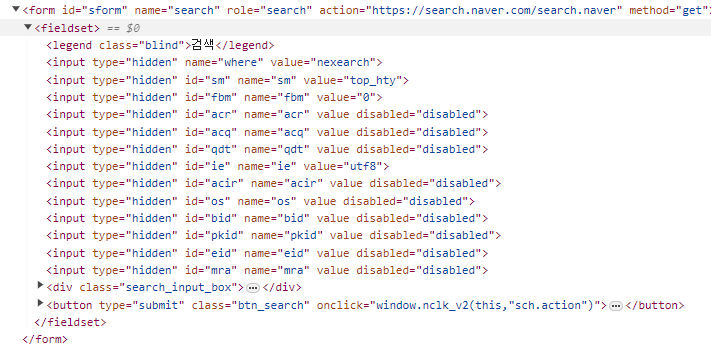

In [12]:
# 검색버튼 클릭하기  --> 위의 사진 참조
# 선택자를 구분지을때 가장 많이 사용되는 것 By.CSS_SELECTOR--> 개발자 도구에서 copy selector을 입력
btn = driver.find_element(By.CSS_SELECTOR,'#sform > fieldset > button')
# 클릭함수 --> click()
btn.click()

# nx_search_form > fieldset > button  --> 먼가 검색된 상태의 페이비에서 검색버튼 copy selector
# #sform > fieldset > button --> 네이버 메인에서 검색버튼 copy selector
# 참고 --> 클래스는 태그.클래스명인데 id는 태그#아이디명 이 아니고 그냥 #아이디명

In [13]:
# 창을 종료 해보자 --> 브라우저의 x버튼 누르기 --> hmtl코드아니고 브라우저에게 바로준다
driver.close()

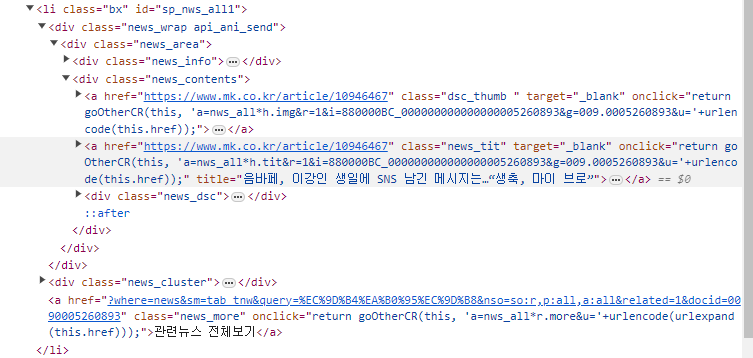

In [22]:
# 위 사진 참조
# 글자만 수집  -> 글자의 태그 정보 --> 역시 By.CSS_SELECTOR --> 개발자 도구에서 copy selector을 입력
# 글자정보는 복수개 이므로 find_elements
# title = driver.find_elements(By.CSS_SELECTOR,'#sp_nws_all4 > div.news_wrap.api_ani_send > div > div.news_contents > a.news_tit')
# 위의 선택자는 개발자 도구에서 copy selector에서 가져온 것이므로 1개만 수집된다 
# 고로 복수개를 추출하기 위해서는 단수선택자를 제거하자~ --> 여기서는 id선택자인 #sp_nws_all4 만 단수개 이므로 삭제한다

title = driver.find_elements(By.CSS_SELECTOR,'div.news_wrap.api_ani_send > div > div.news_contents > a.news_tit')
print(len(title))
title

# soup.select()함수는 선택자 추출이다 ,find_elements()함수도 선택자 추출이다 
# select()함수처럼 find_elements()함수도 리스트를 반환한다

4


[<selenium.webdriver.remote.webelement.WebElement (session="dd2918bf7a44b12677f65aa517892a0e", element="58D2A6D8FACCC4E18774960493FE58A1_element_12737")>,
 <selenium.webdriver.remote.webelement.WebElement (session="dd2918bf7a44b12677f65aa517892a0e", element="58D2A6D8FACCC4E18774960493FE58A1_element_12779")>,
 <selenium.webdriver.remote.webelement.WebElement (session="dd2918bf7a44b12677f65aa517892a0e", element="58D2A6D8FACCC4E18774960493FE58A1_element_12792")>,
 <selenium.webdriver.remote.webelement.WebElement (session="dd2918bf7a44b12677f65aa517892a0e", element="58D2A6D8FACCC4E18774960493FE58A1_element_12820")>]

In [23]:
# 순수한 텍스트만 출력
title_list=[]
for i in title :
    title_list.append(i.text.strip())
title_list

['음바페, 이강인 생일에 SNS 남긴 메시지는…“생축, 마이 브로”',
 '아라치 치킨, 이강인과 모델 계약 연장 안 한다',
 '"성지순례 왔어요"…5개월 전 \'이강인 사주\' 어땠길래',
 '"이강인 PSG서 방출, FIFA는 이적 금지"…가짜뉴스 확산']

In [ ]:
# 한페이지안에 수집 --> req
# 여러 페이지 안에 수집 --> selenium --> 페이지를 뒤로가기 닫기 등을 하면서 여러 페이지를 검색하고 수집하는데 유용
# selenium은 파이썬에서 kernel > runall를 누르면 안됨 한칸씩 실행하자.